# Loan data exploration


## Preliminary Wrangling

> This document explores a [dataset](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554484977406000) about multiple types of loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We will only explore about a dozen of variables in order to target the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather the data

Load in the dataset 

In [2]:
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


After going through the 81 variables of the original dataset, we have made a pre-selection of the variables of interest for this analysis. You can find the descriptions of all 81 fields in this [spreadsheet](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

Variables we decided to keep for exploration steps: 
- ListingNumber
- ListingCreationDate
- BorrowerRate (interest rate)
- ListingCategory (numeric) 
- IncomeRange
- EmploymentStatus
- EmploymentStatusDuration
- IsBorrowerHomeowner
- TotalCreditLinespast7years
- LoanOriginalAmount
- MonthlyLoanPayment

Re-format the dataset to only keep the selected variables

In [3]:
df_loan = df_loan[['ListingNumber', 'ListingCreationDate', 'BorrowerRate', 'ListingCategory (numeric)', 'IncomeRange', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'TotalCreditLinespast7years', 'LoanOriginalAmount', 'MonthlyLoanPayment']]

In [4]:
df_loan.head()

,ListingNumber,ListingCreationDate,BorrowerRate,ListingCategory (numeric),IncomeRange,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,LoanOriginalAmount,MonthlyLoanPayment
0,193129,2007-08-26 19:09:29.263000000,0.1580,0,"$25,000-49,999",Self-employed,2.0,True,12.0,9425,330.43
1,1209647,2014-02-27 08:28:07.900000000,0.0920,2,"$50,000-74,999",Employed,44.0,False,29.0,10000,318.93
2,81716,2007-01-05 15:00:47.090000000,0.2750,0,Not displayed,Not available,NaN,False,3.0,3001,123.32
3,658116,2012-10-22 11:02:35.010000000,0.0974,16,"$25,000-49,999",Employed,113.0,True,29.0,10000,321.45
4,909464,2013-09-14 18:38:39.097000000,0.2085,2,"$100,000+",Employed,44.0,True,49.0,15000,563.97


### Assess the data

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingNumber                 113937 non-null int64
ListingCreationDate           113937 non-null object
BorrowerRate                  113937 non-null float64
ListingCategory (numeric)     113937 non-null int64
IncomeRange                   113937 non-null object
EmploymentStatus              111682 non-null object
EmploymentStatusDuration      106312 non-null float64
IsBorrowerHomeowner           113937 non-null bool
TotalCreditLinespast7years    113240 non-null float64
LoanOriginalAmount            113937 non-null int64
MonthlyLoanPayment            113937 non-null float64
dtypes: bool(1), float64(4), int64(3), object(3)
memory usage: 8.8+ MB


In [6]:
df_loan.describe()

,ListingNumber,BorrowerRate,ListingCategory (numeric),EmploymentStatusDuration,TotalCreditLinespast7years,LoanOriginalAmount,MonthlyLoanPayment
count,1.139370e+05,113937.000000,113937.000000,106312.000000,113240.000000,113937.00000,113937.000000
mean,6.278857e+05,0.192764,2.774209,96.071582,26.754539,8337.01385,272.475783
std,3.280762e+05,0.074818,3.996797,94.480605,13.637871,6245.80058,192.697812
min,4.000000e+00,0.000000,0.000000,0.000000,2.000000,1000.00000,0.000000
25%,4.009190e+05,0.134000,1.000000,26.000000,17.000000,4000.00000,131.620000
50%,6.005540e+05,0.184000,1.000000,67.000000,25.000000,6500.00000,217.740000
75%,8.926340e+05,0.250000,3.000000,137.000000,35.000000,12000.00000,371.580000
max,1.255725e+06,0.497500,20.000000,755.000000,136.000000,35000.00000,2251.510000


Check duplicates

In [7]:
df_loan[df_loan.duplicated()]

,ListingNumber,ListingCreationDate,BorrowerRate,ListingCategory (numeric),IncomeRange,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,LoanOriginalAmount,MonthlyLoanPayment
9,1023355,2013-12-02 10:43:39.117000000,0.0629,7,"$25,000-49,999",Employed,269.0,True,32.0,10000,305.54
999,1055932,2013-12-18 14:25:17.053000000,0.1535,1,"$25,000-49,999",Employed,100.0,True,34.0,10000,239.74
2539,1097584,2014-01-11 07:50:08.037000000,0.1224,1,"$100,000+",Employed,107.0,True,27.0,35000,782.81
4942,927246,2013-09-26 09:35:36.317000000,0.3134,7,"$50,000-74,999",Employed,336.0,True,39.0,4000,172.76
5812,920397,2013-09-24 13:27:48.287000000,0.2045,1,"$50,000-74,999",Other,0.0,True,35.0,15000,560.90
...,...,...,...,...,...,...,...,...,...,...,...
113548,1158474,2014-01-23 14:33:25.967000000,0.1960,18,"$75,000-99,999",Employed,0.0,True,31.0,14000,367.81
113636,904020,2013-09-17 11:44:43.177000000,0.1760,1,"$25,000-49,999",Other,0.0,True,39.0,4000,143.81
113733,1002326,2013-11-07 14:26:31.317000000,0.1819,1,"$50,000-74,999",Employed,280.0,False,30.0,10000,254.97
113773,1056749,2013-12-06 05:43:13.830000000,0.1274,1,"$25,000-49,999",Employed,26.0,True,25.0,10000,335.69


##### Data quality issues assessment
1. Non-optimal data type for ListingCreationDate
2. Duplicated rows of loans listings
3. Listing Category is non-interpretable as it is using a code and not a category name
4. Employment status will look better in analysis if we create an ordered category
5. Income range will look better in analysis if we create an ordered category

### Data cleaning

#### Define

##### Data quality tasks to perform before analysis
1. Change datatype ListingCreationDate *from object to datetime*
2. Remove duplicated rows
3. Add lisiting category names into the dataframe: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
4. Set up the EmploymentStatus datatype as an ordered category
5. Set up the IncomeRange datatype as an ordered category

#### Code

In [8]:
# Change datatypes: ListingCreationDate to datetime & ClosedDate to datetime
df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])

In [9]:
# Remove duplicate rows
df_loan.drop_duplicates(inplace=True)
# Reset index of the dataset
df_loan.reset_index(drop= True, inplace=True)

In [10]:
# Dictionnary of listing categories
listing_cat = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}
# Dataframe for listing categories 
df_cat = pd.DataFrame(list(listing_cat.items()))
# Apply correct naming for columns
df_cat.rename(columns={0: "CategoryNum", 1: "LoanCategory"}, inplace= True)
# Merge listing category names and drop the listing category code
df_loan = df_loan.merge(df_cat, how= 'left', left_on= 'ListingCategory (numeric)', right_on='CategoryNum')
df_loan.drop(labels=['ListingCategory (numeric)', 'CategoryNum'], axis = 1, inplace= True)
# Turn into category datatype
df_loan['LoanCategory'] = df_loan['LoanCategory'].astype('category')

In [11]:
# converting the EmploymentStatus into an ordered category type
order_empl_status = ['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Retired', 'Not employed', 'Not available', 'Other']
ordered_empl_status = pd.api.types.CategoricalDtype(order_empl_status, ordered= True)
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype(ordered_empl_status)


In [12]:
# converting the IncomeRange into an ordered category type
order_income_range = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']
ordered_income_range = pd.api.types.CategoricalDtype(order_income_range, ordered= True)
df_loan['IncomeRange'] = df_loan['IncomeRange'].astype(ordered_income_range)


#### Test

In [13]:
#Check changed datatype ListingCreationDate
print(df_loan.ListingCreationDate.dtypes)

datetime64[ns]


In [14]:
# Check if we still find duplicates
df_loan[df_loan.duplicated()]

,ListingNumber,ListingCreationDate,BorrowerRate,IncomeRange,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,LoanOriginalAmount,MonthlyLoanPayment,LoanCategory


In [15]:
# Look up the loan categories
df_loan.LoanCategory.value_counts()

Debt Consolidation    57624
Not Available         16965
Other                 10448
Home Improvement       7388
Business               7157
Auto                   2568
Personal Loan          2395
Household Expenses     1987
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           762
Student Use             756
Motorcycle              304
Engagement Ring         214
Baby&Adoption           196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: LoanCategory, dtype: int64

In [16]:
#Check changed datatype EmploymentStatus
print(df_loan.EmploymentStatus.dtypes)

category


In [17]:
#Check changed datatype IncomeRange
print(df_loan.IncomeRange.dtypes)

category


Check on the dataset as it is at this stage

In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113065
Data columns (total 11 columns):
ListingNumber                 113066 non-null int64
ListingCreationDate           113066 non-null datetime64[ns]
BorrowerRate                  113066 non-null float64
IncomeRange                   113066 non-null category
EmploymentStatus              110811 non-null category
EmploymentStatusDuration      105441 non-null float64
IsBorrowerHomeowner           113066 non-null bool
TotalCreditLinespast7years    112369 non-null float64
LoanOriginalAmount            113066 non-null int64
MonthlyLoanPayment            113066 non-null float64
LoanCategory                  113066 non-null category
dtypes: bool(1), category(3), datetime64[ns](1), float64(4), int64(2)
memory usage: 7.3 MB


### What is the structure of your dataset?

> There are 113,066 loans in the dataset with 10 features (ListingCreationDate, BorrowerRate (interest rate), LoanCategory, IncomeRange, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, TotalCreditLinespast7years, LoanOriginalAmount, MonthlyLoanPayment). Half variables are numeric, but the following variables have a different nature: 
- ListingCreationDate : time
- EmploymentStatus, IncomeRange: ordered categories
- IsBorrowerHomeowner: true or false 
- LoanCategory: category


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in finding out what features affects the most the *loan's interest rate* level and besides I will investigate which features are influencing to the *loan amount*.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that the owner's status features and income of the borrower are the features that determine mostly the interest rate. Then the amount of the loan, category, number of credit lines in the past I expect will also affect it but to a lesser extend.

## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: Borrower's rate (or interest rate).

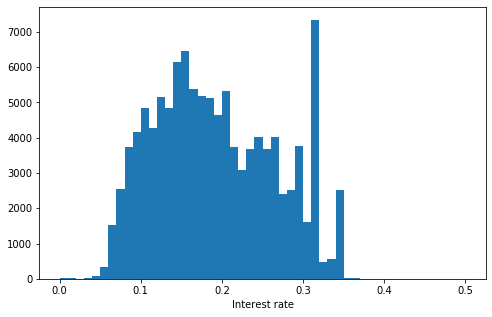

In [19]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, df_loan['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerRate', bins = bins)
plt.xlabel('Interest rate')
plt.show()

In [20]:
df_loan.BorrowerRate.mean()

0.19294574275200593

> The distribution of the interest rate looks almost normal with the mean situated at around 19%. It is just slightly right skewed but, there is an unexpected/isolated high peak at about 32%. There are very little loans lower than 5% and higher than 35%

Next, the first influencing variables of interest: Income ranges and Employement status

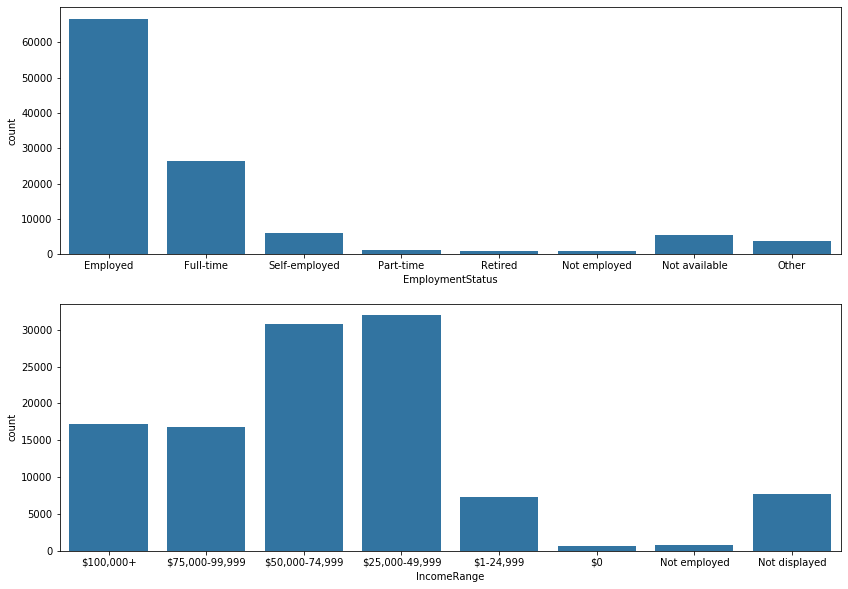

In [21]:
# let's plot all two together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [14,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'IncomeRange', color = default_color, ax = ax[1])

plt.show()

> Employment status: A major part of the people are employed or full-time working. Only a few are self-employed and the rest are part-time, retired or under an unknown status of employment.

> Income range: the most common borrowers are in the ranges of 25K dollars to 75K dollars income, the second biggest group of borrowers earn more than 75k dollars and the fewer earn less than 25K dollars or nothing.


What is the disitribution of the Categories of loan?

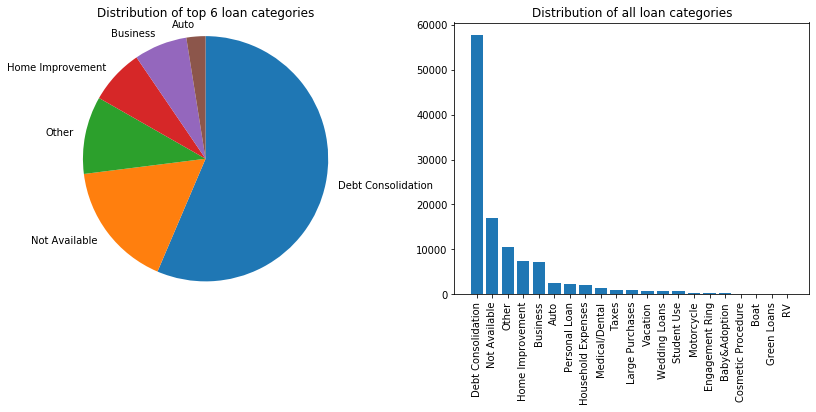

In [113]:
# Plot pie chart with top 6 categories of loans & bar chart with all categories

plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
top_6_loan_cat = df_loan['LoanCategory'].value_counts().nlargest(6)
plt.pie(top_6_loan_cat, labels = top_6_loan_cat.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Distribution of top 6 loan categories')

plt.subplot(1, 2, 2)
df_loan_cat = df_loan['LoanCategory'].value_counts().to_frame()
plt.bar(list(df_loan_cat.index) , df_loan_cat.LoanCategory, color = default_color)
plt.xticks(rotation = 90)
plt.title('Distribution of all loan categories');


> The non represented 14 other categories represent less than 10% of all the loans. So about 50 % of all debts are about debt consolidation, for around a quarter of the top 6 categories of loans, their nature is unknown and the next loans in line are about home improvement, business and Auto.

What proportion of loans are queried by homeowners vs. non-homeowners?

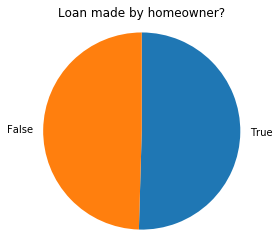

In [23]:
# Plot pie chart for borrower is homeowner (yes-no)?
homeowner_count = df_loan['IsBorrowerHomeowner'].value_counts()
plt.pie(homeowner_count, labels = homeowner_count.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Loan made by homeowner?');

> About 50%-50% of loans are made by home owners in this dataset, only a few 1,000 people more home owners than non-homeowners.

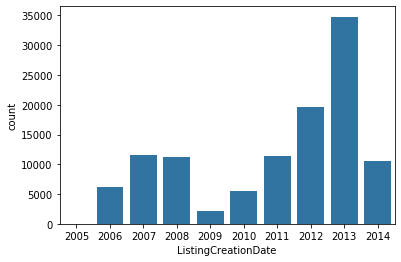

In [24]:
# get time distribution of the loans from the dataset by year

loan_year = df_loan['ListingCreationDate'].dt.year
sb.countplot(data= df_loan, x= loan_year, color= default_color);

> A major part of the loans in this dataset have been listed between 2011 and 2014. It started in 2005, however, there were less loans at the time, with a much lower frequency of loans in 2009 and 2010.

Let's now have a look at the other variables, which are numeric ones:

**EmploymentStatusDuration**

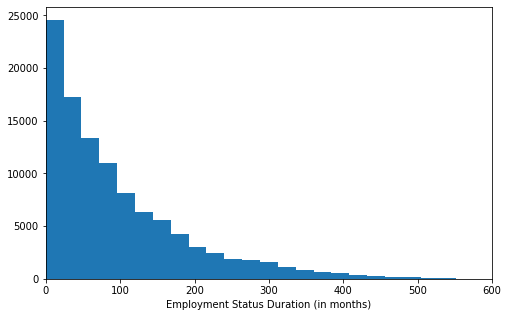

In [25]:
# plotting employment status duration
binsize = 24
bins = np.arange(0, df_loan['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('Employment Status Duration (in months)')
plt.xlim(0,600)
plt.show()

It may be easier to see the disitribution in terms of years than months...

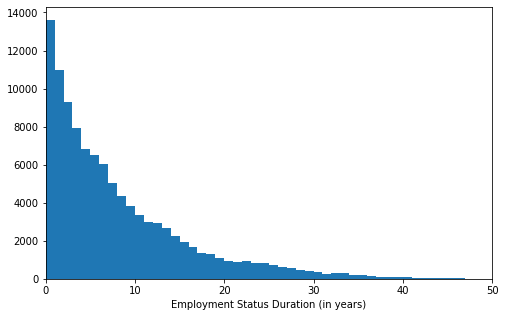

In [26]:
# plotting employment status duration in years
binsize = 1
df_loan['EmploymentStatusDurationYears'] = df_loan['EmploymentStatusDuration']/12
bins = np.arange(0, df_loan['EmploymentStatusDurationYears'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'EmploymentStatusDurationYears', bins = bins)
plt.xlim([0,50])
plt.xlabel('Employment Status Duration (in years)')
plt.show()

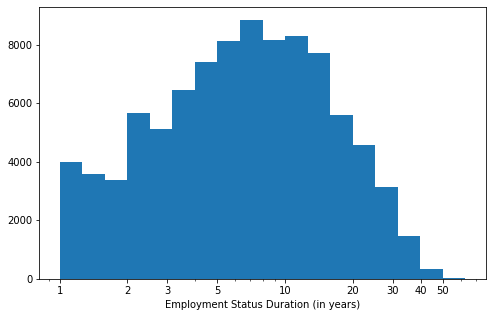

In [27]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_loan['EmploymentStatusDurationYears'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'EmploymentStatusDurationYears', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 3, 5, 10, 20, 30, 40, 50], [1, 2, 3, 5, 10, 20, 30, 40, 50])
plt.xlabel('Employment Status Duration (in years)')
plt.show()

> The employment duration distribution is long tailed and right skewed. Most of the borrowers have been employed at the listing date for less than 10 years, with a peak in 0-1 year employment. A smaller part of that population has been employed between 20 and 50+ years.

**TotalCreditLinespast7years**

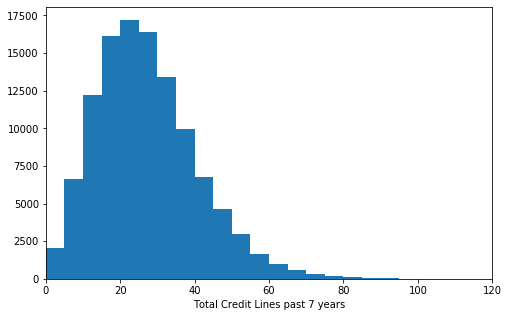

In [28]:
# plotting TotalCreditLinespast7years
binsize = 5
bins = np.arange(0, df_loan['TotalCreditLinespast7years'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'TotalCreditLinespast7years', bins = bins)
plt.xlabel('Total Credit Lines past 7 years')
plt.xlim(0,120)
plt.show()

> The distribution of total credit lines in the past 7 years peaks at 20-25 and is slightly right skewed with up to 80+ credit lines. So many borrowers have been using credit lines over time.

**LoanOriginalAmount**

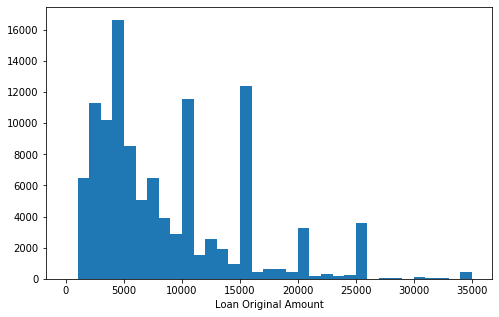

In [29]:
# plotting LoanOriginalAmount
binsize = 1000
bins = np.arange(0, df_loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount')

plt.show()

> The distribution of loan amounts is right skewed with regular peaks every 5K at around 5K, 10K, 15K, 20K and 25K which indicates that they just correspond to more common amounts borrowed. The underlying distribution places a higher frequency at loans of lower amounts, majoritarily until 5K dollars.

**MonthlyLoanPayment**

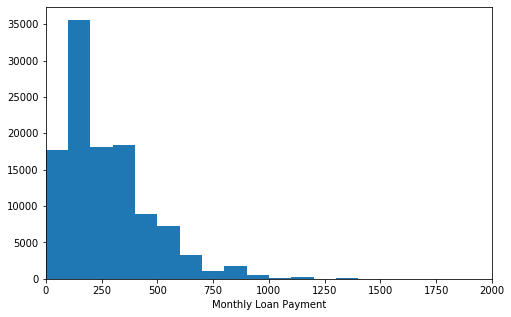

In [30]:
# plotting MonthlyLoanPayment
binsize = 100
bins = np.arange(0, df_loan['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment')
plt.xlim(0,2000)

plt.show()

> Once again this distribution is right skewed. The monthly loan payments are majoritarily less than 500 dollars with a peak of loans reimbursed monthly at 200 dollars.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the interest rate is unimodal and looks almost normal with the mean situated at around 19%. It is just slightly right skewed but, there is an unexpected/isolated high peak at about 32%. There are very little loans with an interest rate lower than 5% and higher than 35%

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The features investigated looked quite regular and did not show any sign of need to clean the data. We will go on with the bivariate exploration to understand the relationship of features with our variable of interest.

## Bivariate Exploration


Make a list for numeric and categorical variables

In [31]:
# list variables by type
numeric_vars = ['BorrowerRate','EmploymentStatusDurationYears', 'TotalCreditLinespast7years', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars = ['EmploymentStatus', 'IncomeRange', 'LoanCategory']


Let's now explore our variable of interest (the interest rate) and compare it to the features that we initially believe will influence the most our variable of interest.

These features are categorical (employment status and income range). We will therefore plot our **categorical variables** against our **numerical variable of interest**, the interest rate aka borrower rate.

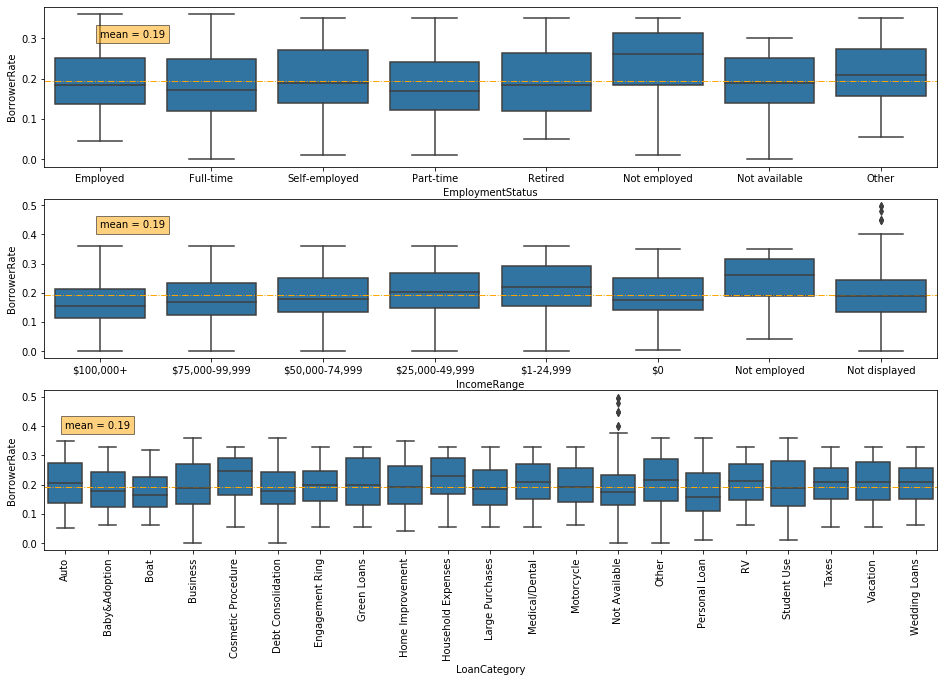

In [114]:
# Plot boxplots to illustrate relationship between borrower's rate and categorical variables

fig, ax = plt.subplots(nrows=3, figsize = [16,10])

base_color = sb.color_palette()[0]
sb.boxplot(data = df_loan, x = categoric_vars[0], y = 'BorrowerRate', color = base_color, ax= ax[0])
ax[0].axhline(df_loan['BorrowerRate'].mean(), color='orange', linestyle='-.', linewidth=1)
ax[0].text(0, df_loan['BorrowerRate'].mean()+0.11, 'mean = 0.19', bbox=dict(facecolor='orange', alpha=0.5))

sb.boxplot(data = df_loan, x = categoric_vars[1], y = 'BorrowerRate', color = base_color, ax= ax[1])
ax[1].axhline(df_loan['BorrowerRate'].mean(), color='orange', linestyle='-.', linewidth=1)
ax[1].text(0, df_loan['BorrowerRate'].mean()+0.23, 'mean = 0.19', bbox=dict(facecolor='orange', alpha=0.5))

sb.boxplot(data = df_loan, x = categoric_vars[2], y = 'BorrowerRate', color = base_color, ax= ax[2]) 
ax[2].axhline(df_loan['BorrowerRate'].mean(), color='orange', linestyle='-.', linewidth=1)
ax[2].text(0, df_loan['BorrowerRate'].mean()+0.2, 'mean = 0.19', bbox=dict(facecolor='orange', alpha=0.5))
plt.xticks(rotation = 90);


> With regard to the employement status, we can not see any major difference of interest rate statistics between the first 5 categories that represent people who are employed, whether they are full-time, part-time, independant and even retired. *Only categories with unemployed or other status are significantly more likely to have a higher interest rate for their loans.*
>
> As for the income range, as expected *a person with higher income faces lower interest rate means than another person earning a smaller wage and unemployed people face even higher interest rates*. However, this trend seems to be very light and barely significant. On another point, there is a rather surprising statistic for the category of 0 dollar income for which the interest rate is lower. However, we will interpret this as an exception and not a rule to the rest of the behavior of the income vs. interest rate variables.
>
>Lastly, we took a look at our last categorical variable to see its influence on interest rate. Despite again a quite slight variation amongst loan categories, there is a change in mean and variance, just like the 2 categories above, 
we see that in general the means still gravitate not so far from the general mean of 19%. Our top 6 categories including debt consolidation, business, auto, home improvement and others are very much approaching the mean. Some like cosmetic procedure or household expenses and RV tend to get higher interest rates. 

>All in all, *for the category variables above, the means of interest rate gravitate not so far from the general mean of 19%.* The main things to retain from this comparisons are:
>- **Interest rate will vary if a person is employed (lower interest) vs. unemployed (higher interest).** It does not seems to be any discrimination in interest rate based on which status of employement people are in except if they are non-employed. Full-time, self-employed or retired have very similar interest rate distributions and statistics.
>- Income range is a feature that has **slight influence** on the level of interest rate of a loan. **As a general rule, the lower the income of a person, the higher is their loan interest rate.**
>- **Interest rate can vary slightly by loan category.**

Let's explore our next categorical variable (bool) which qualifies if a borrower is homeowner or not. First, we will compare it to our 2 main categorical features and then verify its relationship with our interest rate

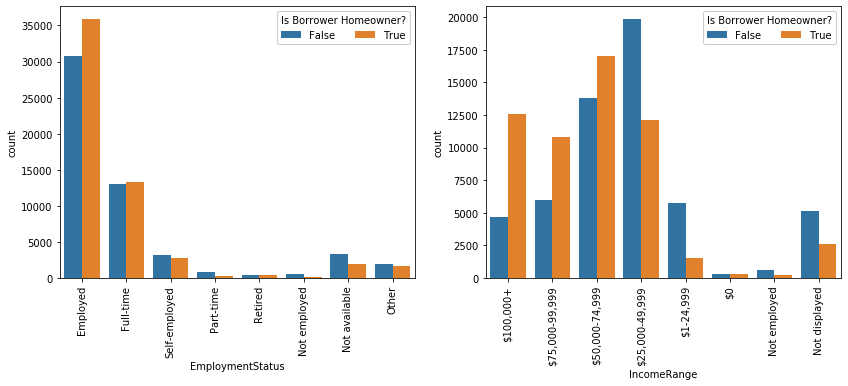

In [37]:
plt.figure(figsize = [14, 5])

plt.subplot(1,2,1)
ax = sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Is Borrower Homeowner?')
plt.xticks(rotation= 90)


plt.subplot(1,2,2)
ax = sb.countplot(data = df_loan, x = 'IncomeRange', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Is Borrower Homeowner?')
plt.xticks(rotation= 90);

> 

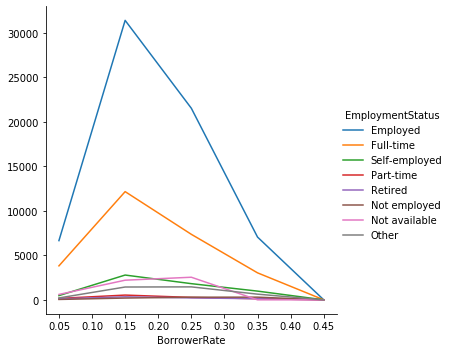

In [35]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2


    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()


    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(0, df_loan['BorrowerRate'].max()+0.1, 0.1)
g = sb.FacetGrid(data = df_loan, hue = 'EmploymentStatus', height = 5)
g.map(freq_poly, "BorrowerRate", bins = bin_edges)
g.add_legend();

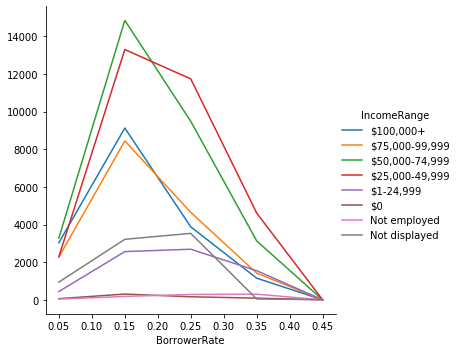

In [36]:
bin_edges = np.arange(0, df_loan['BorrowerRate'].max()+0.1, 0.1)
g = sb.FacetGrid(data = df_loan, hue = 'IncomeRange', height = 5)
g.map(freq_poly, "BorrowerRate", bins = bin_edges)
g.add_legend();

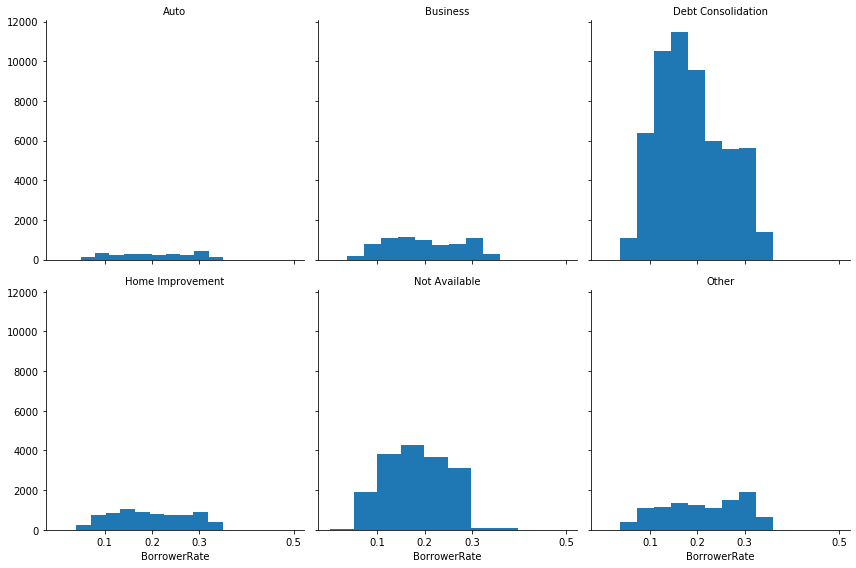

In [61]:
# Plot each top 6 category and their borrower's rate
df_top_6_cat = top_6_loan_cat.to_frame().reset_index()
df_loan_top_6_cat = df_loan[df_loan['LoanCategory'].isin(list(df_top_6_cat['index']))].reset_index()
df_loan_top_6_cat['LoanCategory'] = df_loan_top_6_cat['LoanCategory'].astype('str')
df_loan_top_6_cat['LoanCategory'] = df_loan_top_6_cat['LoanCategory'].astype('category')

g = sb.FacetGrid(data = df_loan_top_6_cat, col = 'LoanCategory', col_wrap = 3, height = 4)
g.map(plt.hist, "BorrowerRate").set(xticks=[0.1,0.2, 0.3, 0.5])
g.set_titles('{col_name}');

/Users/lauranne.kerkhove/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lauranne.kerkhove/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


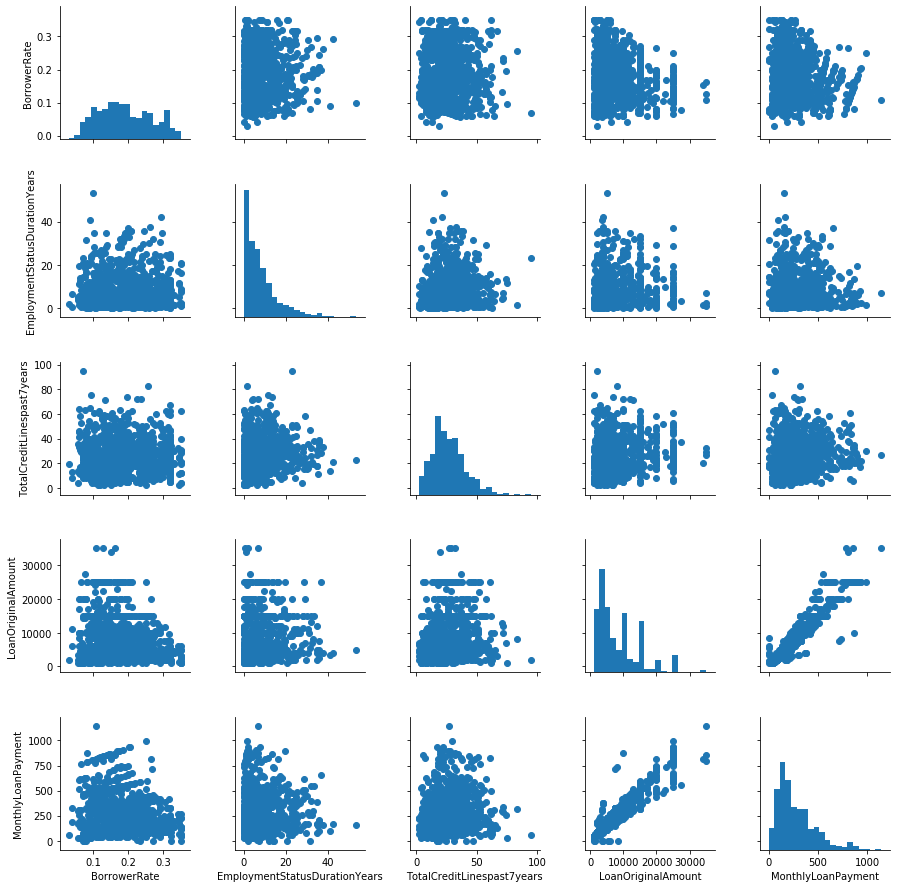

In [34]:
# plot matrix: sample 1000 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df_loan.shape[0], 1000, replace = False)
loan_samp = df_loan.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

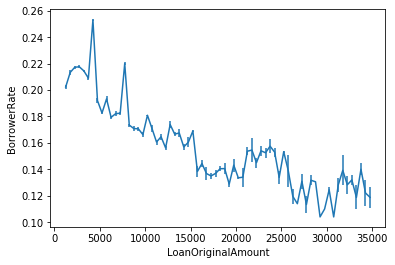

In [38]:
# set bin edges, compute centers
bin_size = 500
xbin_edges = np.arange(0, df_loan['LoanOriginalAmount'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]


# compute statistics in each bin
data_xbins = pd.cut(df_loan['LoanOriginalAmount'], xbin_edges, right = False, include_lowest = True)
y_means = df_loan['BorrowerRate'].groupby(data_xbins).mean()
y_sems = df_loan['BorrowerRate'].groupby(data_xbins).sem()


# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate');

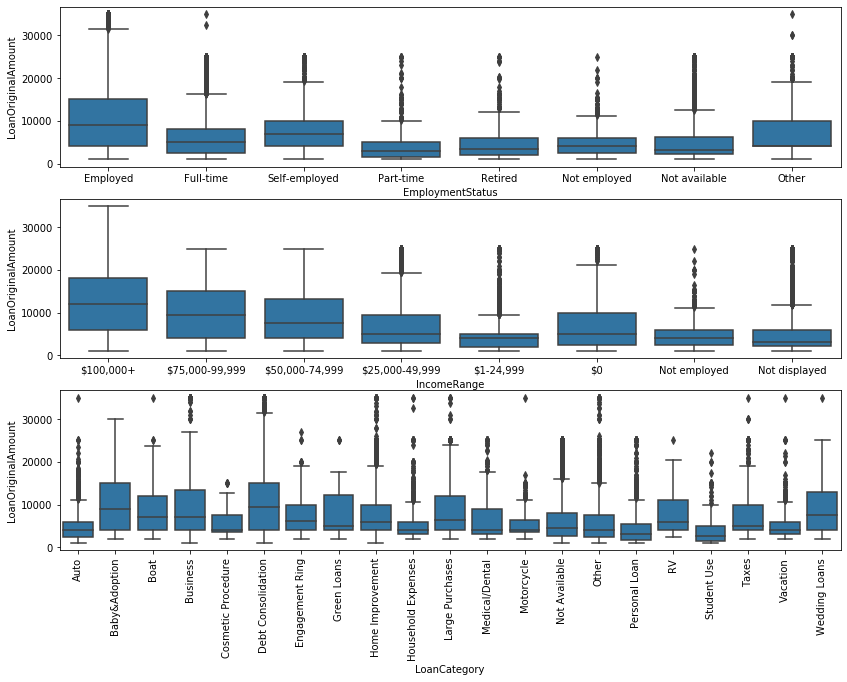

In [33]:
# Plot boxplots to illustrate relationship between Loan amount and categorical variables

fig, ax = plt.subplots(nrows=3, figsize = [14,10])

base_color = sb.color_palette()[0]
sb.boxplot(data = df_loan, x = categoric_vars[0], y = 'LoanOriginalAmount', color = base_color, ax= ax[0]) 
sb.boxplot(data = df_loan, x = categoric_vars[1], y = 'LoanOriginalAmount', color = base_color, ax= ax[1]) ;
sb.boxplot(data = df_loan, x = categoric_vars[2], y = 'LoanOriginalAmount', color = base_color, ax= ax[2]) 
plt.xticks(rotation = 90);

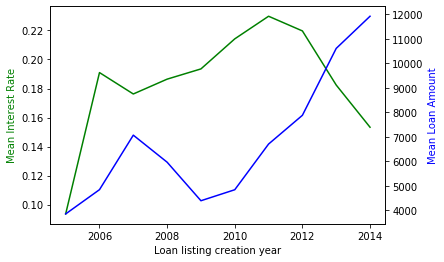

In [86]:
df_time_loan_rate_amount = df_loan.groupby(loan_year)['BorrowerRate','LoanOriginalAmount'].mean().reset_index()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_time_loan_rate_amount['ListingCreationDate'], df_time_loan_rate_amount['BorrowerRate'], 'g-')
ax2.plot(df_time_loan_rate_amount['ListingCreationDate'], df_time_loan_rate_amount['LoanOriginalAmount'], 'b-')

ax1.set_xlabel('Loan listing creation year')
ax1.set_ylabel('Mean Interest Rate', color='g')
ax2.set_ylabel('Mean Loan Amount', color='b')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!